# Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [5]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# читаем файл с данными и сохраняем его в data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
# посмотрим на первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
# рассмотрим общую информацию о данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию подробнее. В таблице 22 столбца, в которых присутствуют следующие типы данных: bool, float64, int64 и object.  

Столбцы содержат следующую информацию:  
 - **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
 - **balcony** — число балконов  
 - **ceiling_height** — высота потолков (м)  
 - **cityCenters_nearest** — расстояние до центра города (м)  
 - **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
 - **first_day_exposition** — дата публикации  
 - **floor** — этаж  
 - **floors_total** — всего этажей в доме  
 - **is_apartment** — апартаменты (булев тип)  
 - **kitchen_area** — площадь кухни в квадратных метрах (м²)  
 - **last_price** — цена на момент снятия с публикации  
 - **living_area** — жилая площадь в квадратных метрах(м²)  
 - **locality_name** — название населённого пункта  
 - **open_plan** — свободная планировка (булев тип)  
 - **parks_around3000** — число парков в радиусе 3 км  
 - **parks_nearest** — расстояние до ближайшего парка (м)  
 - **ponds_around3000** — число водоёмов в радиусе 3 км  
 - **ponds_nearest** — расстояние до ближайшего водоёма (м)  
 - **rooms** — число комнат  
 - **studio** — квартира-студия (булев тип)  
 - **total_area** — площадь квартиры в квадратных метрах (м²)  
 - **total_images** — число фотографий квартиры в объявлении  

### Шаг 2. Предобработка данных

#### Посчитаем доли пропусков всех переменных:

In [8]:
# напишем функцию, которая считает долю пропущенных значений в столбце
def check_na(column):
    try:
        return print(column, 'Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data)),'значений')
    except:
        return print(column, 'Пропущенных значений нет')

# посчитаем на доли пропущенных значений в каждом столбце:    
for row in list(data):
    check_na(row)
    print()

total_images Пропущенных значений нет

last_price Пропущенных значений нет

total_area Пропущенных значений нет

first_day_exposition Пропущенных значений нет

rooms Пропущенных значений нет

ceiling_height Пропущено 38.8% значений

floors_total Пропущено 0.4% значений

living_area Пропущено 8.0% значений

floor Пропущенных значений нет

is_apartment Пропущено 88.3% значений

studio Пропущенных значений нет

open_plan Пропущенных значений нет

kitchen_area Пропущено 9.6% значений

balcony Пропущено 48.6% значений

locality_name Пропущено 0.2% значений

airports_nearest Пропущено 23.4% значений

cityCenters_nearest Пропущено 23.3% значений

parks_around3000 Пропущено 23.3% значений

parks_nearest Пропущено 65.9% значений

ponds_around3000 Пропущено 23.3% значений

ponds_nearest Пропущено 61.6% значений

days_exposition Пропущено 13.4% значений



#### Далее, последовательно разберем каждую переменную с пропущенными значениями и решим, что и как с ней делать:

#### 1. floors_total (всего этажей в доме).  
Пропущено 0,4% значений. Данные будут дальше использоваться при дальнейшем анализе, а заменить пропущенные значения не представляется возможным, поэтому удалим все строки с такими значениями. Их не так много, поэтому информацию не потеряем.

In [9]:
# удаляем строки с пропущенными значениями в floors_total
data.dropna(subset=['floors_total'], inplace=True)

# проверка 
data['floors_total'].isna().value_counts()

False    23613
Name: floors_total, dtype: int64

#### 2. ceiling_height (высота потолков (м))  
Пропущено 38,8% значений. Заменим их на медиану в зависимости от этажности дома.

In [10]:
# строим сводную таблицу с высотой потолков в зависимости от количества этажей дома
ceiling_height_median = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_height_median.columns = ('median', 'count')
ceiling_height_median.head()

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [11]:
# заменим пропущенные значения в ceiling_height на общую медиану по ceiling_height при условии, что на этаже есть только пропущенные значения
for fl in data['floors_total'].unique():
        data.loc[(data['floors_total'] == fl) & (ceiling_height_median.loc[fl, 'count']==0), 'ceiling_height'] = \
        data['ceiling_height'].describe()[5]

In [12]:
# заменяем пропущенные значения в ceiling_height на медианное значение высоты потолков в соответствии с этажом в доме
for fl in data['floors_total'].unique():
        data.loc[(data['floors_total'] == fl) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] == fl, 'ceiling_height'].median()

In [13]:
# проверка замены пропусков
data['ceiling_height'].isna().value_counts()

False    23613
Name: ceiling_height, dtype: int64

#### 3. living_area (жилая площадь в квадратных метрах(м²))
Пропущено 8,0% значений. Заменим пропущенные значения на медиану в зависимости от количества комнат в квартире.

In [14]:
# заменяем пропущенные значения в living area на медианное значение площади в соответствии с количеством комнат в квартире  
for room in data['rooms'].unique():
        data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
        data.loc[data['rooms'] == room, 'living_area'].median()

In [15]:
# проверка замены пропусков
data['living_area'].isna().value_counts()

False    23613
Name: living_area, dtype: int64

#### 4. kitchen_area (площадь кухни в квадратных метрах (м²))  
Пропущено 9,6% значений. Заменим пропущенные значения на медиану в зависимости от общей жилой площади.

In [16]:
# строим сводную таблицу с площадью кухни в зависимости от жилой площади
#kitchen_area_median = data.pivot_table(index='living_area', values='kitchen_area', aggfunc=['median', 'count'])
#kitchen_area_median.columns = ('median', 'count')
#kitchen_area_median.head()

In [17]:
# заменяем пропущенные значения на общие медианные значения площади кухни для случаев, когда нельзя заменить на медианные значения в соответствии с жилой площадью  
#for area in data['living_area'].unique():
#       data.loc[(data['living_area'] == area) & (kitchen_area_median.loc[area, 'count']==0), 'kitchen_area'] = \
#      data['kitchen_area'].describe()[5]

In [18]:
# заменяем пропущенные значения на медианные значения в соответствии с общей жилой площадью
#for ka in data['living_area'].unique():
#        data.loc[(data['living_area'] == ka) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
#        data.loc[data['living_area'] == ka, 'kitchen_area'].median()

In [19]:
# посчитаем долю, которую в среднем занимает кухня от оющей жилой площади
data['kitchen_area_share'] = data['kitchen_area']/data['total_area']
data['kitchen_area_share'].describe()

count    21382.000000
mean         0.187324
std          0.072976
min          0.025381
25%          0.133333
50%          0.172348
75%          0.232428
max          0.787879
Name: kitchen_area_share, dtype: float64

In [20]:
# заменим пропущенные значения в kitchen_area на среднее отношение площади кухни к общей площади 
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area']*data['kitchen_area_share'].describe()[1]

In [21]:
# проверка
data['kitchen_area'].isna().value_counts()

False    23613
Name: kitchen_area, dtype: int64

#### 5. balcony (число балконов)
Пропущено 48,6% значений. Если человек не указывает наличие балкона, то предположим, что его нет. Соответственно, заменим все пропущенные значения на 0.

In [22]:
# заменяем в balcony все пропущенные значения на 0 
data['balcony'].fillna(0, inplace=True)

# проверка
data['balcony'].isna().value_counts()

False    23613
Name: balcony, dtype: int64

#### 6. locality_name (название населённого пункта)  
Пропущено 0,2% значений.Данные будут дальше использоваться при дальнейшем анализе, а заменить пропущенные значения не представляется возможным, поэтому удалим все строки с такими значениями. Их не так много, поэтому информацию не потеряем.  

In [23]:
# удаляем строки с пропущенным значениями
data.dropna(subset=['locality_name'], inplace=True)

# проверка
data['locality_name'].isna().value_counts()

False    23565
Name: locality_name, dtype: int64

#### 7. cityCenters_nearest (расстояние до центра города (м))
Пропущено 23,3% значений. Необходимо посмотреть сколько пропущенных значений в этом столбце по Санкт-Петербургу. Если таких значений будет мало, то оставим без заполнения, потому что при заполнении медианой можем потерять смысл.

In [24]:
# проверяем сколько пропущенных значений по Санкт-Петербургу
(round(len(data[(data['locality_name']=='Санкт-Петербург') & (data['cityCenters_nearest'].isna())])/len(data),3))

0.003

Пропущено всего 0,3%, оставим пропуски как есть в виду трудоемкости их заполнения.

#### 8. days_exposition (сколько дней было размещено объявление (от публикации до снятия))  
Пропущено 13,4%. Заменим пропущенные значения на медиану.

In [25]:
# заменяем пропущенные значения на медиану
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]

# проверка
data['days_exposition'].isna().value_counts()

False    23565
Name: days_exposition, dtype: int64

#### 9. is_apartment (апартаменты), airports_nearest  (расстояние до ближайшего аэропорта в метрах), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка), ponds_around3000 (число водоёмов в радиусе 3 км), ponds_nearest (расстояние до ближайшего водоёма)  
Столбцы не требуются для решения задачи, поэтому в них оставим пропуски.

In [26]:
# общая проверка 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300


### Вывод

В столбцах *floors_total и locality_name* удалили строки с пропущенными значениями в виду того, что эти данные далее будут использоваться в дальнейшем анализе, а объем пропущенных значений позволяет их сократить, не потеряв в репрезентативности данных.  
В столбце *balcony* заменили пропущенные значения на 0, потому что можно предположить, что пропуск сделан, потому что у пользователя нет балкона.  
В столбцах *ceiling_height, living_area, kitchen_area, days_exposition* заменили пропущенные значения на медианные, чтобы сохранить параметры распределения.  
В столбце *cityCenters_nearest* оставили 0,03% пропущенных значений в Санкт-Петербурге в виду трудоемкого заполнения.
Остальные переменные с пропущенными значениями не будут участвовать в решении поставленных задач, поэтому их не обрабатывали.

#### Далее, поработаем над типами переменных: 

In [27]:
# заменяем на int в переменных, где удобнее анализировать целые числа
data['last_price']=data['last_price'].astype(int)
data['floors_total']=data['floors_total'].astype(int)
data['balcony']=data['balcony'].astype(int)
data['days_exposition']=data['days_exposition'].astype(int)

# переводим в формат даты
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
# проверка
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
kitchen_area_share             float64
dtype: object

### Шаг 3. Посчитайте и добавьте в таблицу

#### 1. Добавляем цену квадратного метра новым столбцом в data:

In [29]:
data['price_per_sm'] = round((data['last_price'] / data['total_area']), 1)

#### 2. Добавляем новые столбцы день недели, месяц и год публикации объявления в data:

In [30]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#### 3. Добавляем столбец с категорической переменной с этажом квартиры

In [31]:
data['floor_cat'] = 'другой'
data['floor_cat'] = data['floor_cat'].where(data['floor'] != 1, 'первый')
data['floor_cat'] = data['floor_cat'].where(data['floor'] != data['floors_total'], 'последний')
data['floor_cat'].value_counts()

другой       17326
последний     3355
первый        2884
Name: floor_cat, dtype: int64

#### 4. Добавляем новые столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей

In [33]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Чтобы приступить к анализу данных, нам необходимо очистить переменные от нехарактерных значений - выбросов.  
Для этого напишем функцию, которая будет выдавать нам нижний и верхний ус диаграммы ящик с усами.

In [34]:
def bp_border (column):
    stat = data[column].describe()
    iqr = stat[6] - stat[4]  #квартильный размах
    lower_border = round(stat[4] - 1.5*iqr, 2)   #нижняя граница
    upper_border = round(stat[6] + 1.5*iqr, 2)   #верхняя граница
    if lower_border < stat[3]: lower_border = stat[3]   #нижняя граница не может быть меньше минимума
    if upper_border > stat[7]: upper_border = stat[7]   #верхняя граница не может быть выше максимума
    return [lower_border, upper_border]

#### Изучим подробнее жилую площадь (total_area):

In [35]:
# получим характерные значения для столбца total_area
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

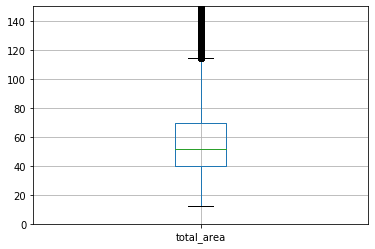

In [36]:
# построим ящик с усами для столбца total_area
plt.ylim(0,150)
data.boxplot('total_area')
plt.show()

In [37]:
# посчитаем границы усов
bp_border('total_area')

[12.0, 114.25]

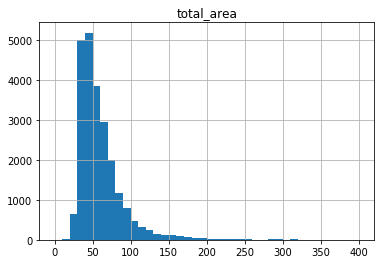

In [38]:
# построим гистограмму для столбца total_area
data.hist('total_area', bins=40, range=(0, 400))
plt.show()

Медианная площадь квартир в городе чуть выше 50 квадратных метров. Отдельно стоит отметить факт наличия квартир площадью всего 12 квадратных метров.  

In [39]:
# функция для подсчета доли аномальных значений
def anomaly(column):
    return 'Доля аномальных значений: {:.1%}'.format(len(data.loc[data[column] > bp_border(column)[1]])/len(data))

In [40]:
# посчитаем долю аномальных значений
anomaly('total_area')

'Доля аномальных значений: 5.3%'

In [41]:
# создаем булевый столбец с аномальными значениями
data['total_area_anomaly'] = data['total_area'] > bp_border('total_area')[1]

Как можно заметить в переменной total_area встречается 5,3% аномальных значений. Такими значениями признаем те, у которых площадь квартиры больше 114,25 метров. 

#### Теперь рассмотрим подробнее цену (last_price):

In [42]:
# получим характерные значения для столбца last_price
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

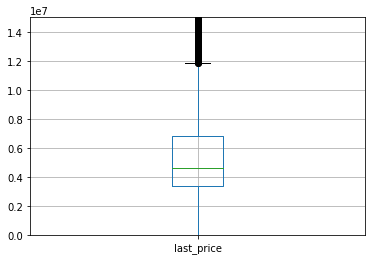

In [43]:
# построим ящик с усами для столбца last_price
plt.ylim(0, 15e6)
data.boxplot('last_price')
plt.show()

In [44]:
# посчитаем границы усов
bp_border('last_price')

[12190.0, 11875000.0]

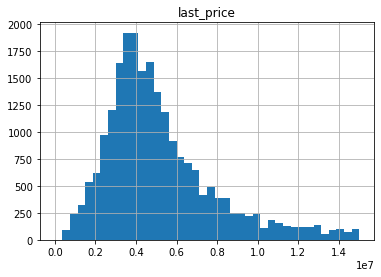

In [45]:
# построим гистограмму для столбца last_price
data.hist('last_price', bins=40, range=(0, 15e6))
plt.show()

Медианная стоимость квартиры находится в районе 4.6 млн. рублей.

In [46]:
# посчитаем долю аномальных значений
anomaly('last_price')

'Доля аномальных значений: 8.7%'

In [47]:
# создаем булевый столбец с аномальными значениями
data['last_price_anomaly'] = data['last_price'] > bp_border('last_price')[1]

Доля аномальных значений в переменной last_price равна 8,7%. Так, цены выше 11,875 млн. будем считать выбросами.

#### Теперь рассмотрим число комнат (rooms):

In [48]:
# получим характерные значения для столбца rooms
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

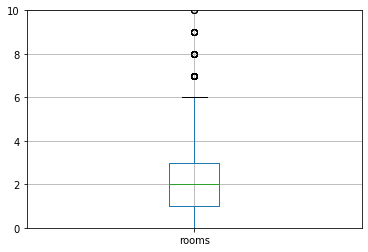

In [49]:
# построим ящик с усами для столбца rooms
plt.ylim(0, 10)
data.boxplot('rooms')
plt.show()

In [50]:
# посчитаем границы усов
bp_border('rooms')

[0.0, 6.0]

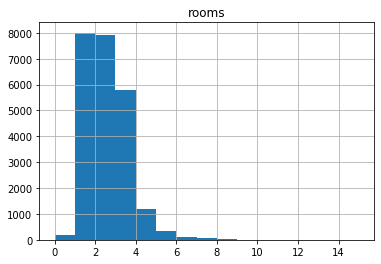

In [51]:
# построим гистограмму для столбца rooms
data.hist('rooms', bins=15, range=(0, 15))
plt.show()

В среднем в городе продаются двухкомнатные квартиры.

In [52]:
# посчитаем долю аномальных значений
anomaly('rooms')

'Доля аномальных значений: 0.4%'

In [53]:
# создаем булевый столбец с аномальными значениями
data['rooms_anomaly'] = data['rooms'] > bp_border('rooms')[1]

Доля аномальных значений в переменной rooms равна 0,4%. Так, 7 и выше комнат в квартире признаем аномальным значением.

#### Далее, изучим высоту потолков (ceiling_height)

In [54]:
# получим характерные значения для столбца ceiling_height
data['ceiling_height'].describe()

count    23565.000000
mean         2.735737
std          0.996999
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

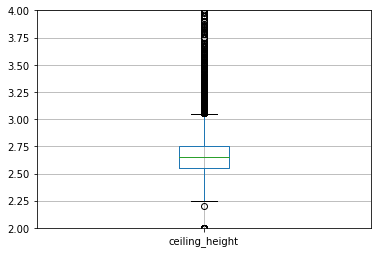

In [55]:
# построим ящик с усами для столбца ceiling_height
plt.ylim(2, 4)
data.boxplot('ceiling_height')
plt.show()

In [56]:
# посчитаем границы усов
bp_border('ceiling_height')

[2.25, 3.05]

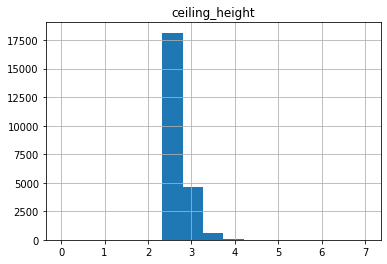

In [57]:
# построим гистограмму для столбца ceiling_height
data.hist('ceiling_height', bins=15, range=(0, 7))
plt.show()

Типичная высота потолков в городе 2.65 метра.

In [58]:
# посчитаем долю аномальных значений
anomaly('ceiling_height')

'Доля аномальных значений: 6.2%'

In [59]:
# создаем булевый столбец с аномальными значениями
data['ceiling_height_anomaly'] = (data['ceiling_height'] > bp_border('ceiling_height')[1]) | (data['ceiling_height'] < bp_border('ceiling_height')[0])

Доля аномальных значений в переменной ceiling_height равна 6,2%. Так, аномалиями признаем высоту потолка ниже 2,25 метров и выше 3,05 метров.

#### Теперь изучим время продажи квартиры:

In [60]:
# получим характерные значения для столбца days_exposition
data['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

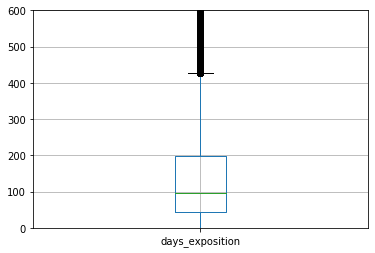

In [61]:
# построим ящик с усами для столбца days_exposition
plt.ylim(0,600)
data.boxplot('days_exposition')
plt.show()

In [62]:
# посчитаем границы усов
bp_border('days_exposition')

[1.0, 427.5]

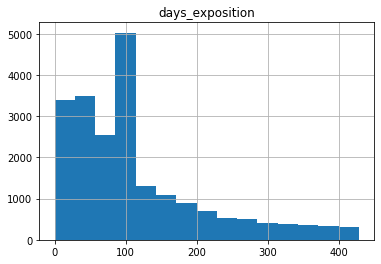

In [63]:
# построим гистограмму для столбца days_exposition
data.hist('days_exposition', bins=15, range=(0,428))
plt.show()

В среднем квартиру удавалось продавать примерно за 3 месяца (95 дней).

In [64]:
# посчитаем долю аномальных значений
anomaly('days_exposition')

'Доля аномальных значений: 9.9%'

In [65]:
# создаем булевый столбец с аномальными значениями
data['days_exposition_anomaly'] = data['days_exposition'] > bp_border('days_exposition')[1]

#### Используя булевые переменные избавимся от аномальных значений в датасете:

In [66]:
good_data = data[(data['total_area_anomaly']==False)
                 &(data['last_price_anomaly']==False)
                 &(data['rooms_anomaly']==False)
                 &(data['ceiling_height_anomaly']==False)
                 &(data['days_exposition_anomaly']==False)].reset_index(drop=True)

In [67]:
print('Доля очищенных значений равна: {:.1%}'.format(len(good_data) / len(data)))

Доля очищенных значений равна: 79.1%


Изучив переменные получили, что средняя квартира, выставленная на продажу имеет следующие характеристики: площадь 52 кв. м., с 2 комнатами, высотой потолков 2,65м и ценой в 4,65 млн. руб., проданная примерно за 3 месяца (95 дней).

#### Рассмотрим факторы, которые могут влиять на стоимость квартиры. Начнем с матрицы корреляций со всеми интересующими нас переменными. Далее, отдельно рассмотрим каждую из них. 

In [68]:
# построим матрицу корреляции, чтобы увидеть, что влияет на цену квартир
good_data[['last_price', 'total_area','cityCenters_nearest','rooms', 'floor_cat', 'day', 'month', 'year']].corr()

,last_price,total_area,cityCenters_nearest,rooms,day,month,year
last_price,1.000000,0.679618,-0.307442,0.416845,-0.011586,0.003728,0.035106
total_area,0.679618,1.000000,-0.079555,0.802302,-0.007217,0.008578,-0.033571
cityCenters_nearest,-0.307442,-0.079555,1.000000,-0.042544,0.003498,-0.015848,0.003164
rooms,0.416845,0.802302,-0.042544,1.000000,0.000970,-0.004765,-0.013799
day,-0.011586,-0.007217,0.003498,0.000970,1.000000,0.014424,-0.011560
month,0.003728,0.008578,-0.015848,-0.004765,0.014424,1.000000,-0.311247
year,0.035106,-0.033571,0.003164,-0.013799,-0.011560,-0.311247,1.000000


Основными факторами влияния на цену квартиры является ее общая площадь и количество комнат. Между расстоянием до центра города и ценой квартиры существует слабая связь. А дата публикации объявления и вовсе не оказывает никакого влияния на цену. 

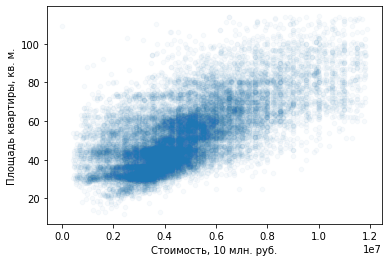

In [69]:
# Построим диаграмму рассеивания для площади и цены 
good_data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.03)
plt.xlabel('Стоимость, 10 млн. руб.')
plt.ylabel('Площадь квартиры, кв. м.')
plt.show()

In [70]:
# Рассчитаем коэффициент корреляции для площади и цены квартиры
print('Коэффициент корреляции: {:.2f}'.format(good_data['total_area'].corr(good_data['last_price'])))

Коэффициент корреляции: 0.68


Площадь квартиры напрямую влияет на её цену: чем выше площадь, тем выше её цена. Коэффициент корреляции 0.68 указывает на сильную прямую зависимость.

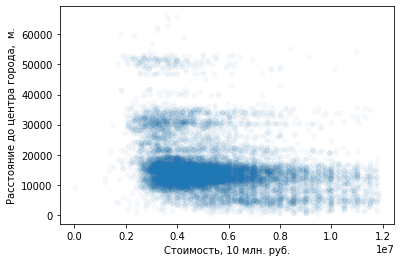

In [71]:
# Построим диаграмму рассеивания для расстояния от центра города и цены 
good_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.03)
plt.xlabel('Стоимость, 10 млн. руб.')
plt.ylabel('Расстояние до центра города,  м.')
plt.show()

In [72]:
# Рассчитаем коэффициент корреляции для расстояния от центра города и цены квартиры
print('Коэффициент корреляции: {:.2f}'.format(good_data['last_price'].corr(good_data['cityCenters_nearest'])))

Коэффициент корреляции: -0.31


Коэффициент корреляции -0.31 указывает на то, что существует слабая отрицательная связь (чем меньше расстояние, тем выше стоимость) между расстоянием от центра города и ценой на квартиру.

#### Далее, рассмотрим как влияет на цену квартиры число комнат и её этажность. А также изучим зависимость от даты размещения: дня недели, месяца, года

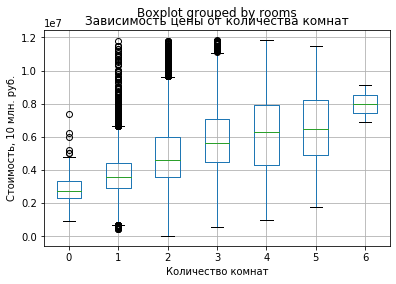

In [73]:
# построим диаграмму размаха для цены и количества комнат
good_data.boxplot('last_price', by='rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от количества комнат')
plt.show()

По диаграмме размаха можно заметить наличие связи между количеством комнат и стоимостью квартиры - чем комнат больше, тем выше и её цена.

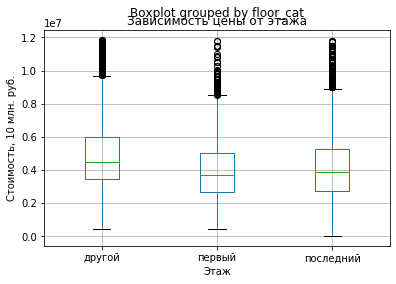

In [74]:
# построим диаграмму размаха для цены и этажа
good_data.boxplot('last_price', by='floor_cat')
plt.xlabel('Этаж')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от этажа')
plt.show()

Присутствует нелинейная связь: квартиры на первом и последнем этаже стоят дешевле, чем на других этажах. 

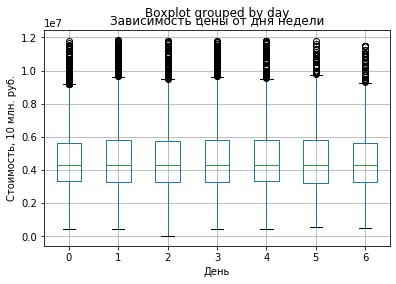

In [75]:
# построим диаграмму размаха для цены и дня недели
good_data.boxplot('last_price', by='day')
plt.xlabel('День')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от дня недели')
plt.show()

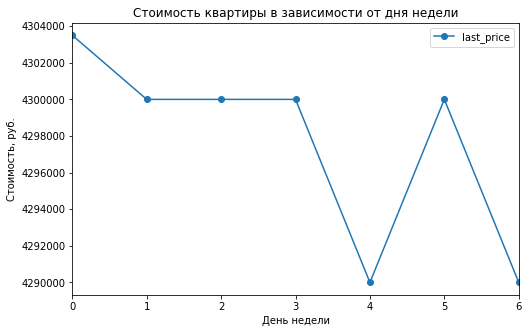

In [76]:
# приблизим масштаб предыдущего графика, построив только для медианных значений цены
(good_data
     .pivot_table(index='day', values='last_price',aggfunc='median')
     .plot(grid=False, figsize=(8,5), xlim=(0,6), style='o-')
)
plt.xlabel('День недели')
plt.ylabel('Стоимость, руб.')
plt.title('Стоимость квартиры в зависимости от дня недели')
plt.show()

День недели не влияет на цену квартиры. Разница медианной цены в течение недели составляет примерно 14 тыс. руб. Так, дешевле квартиры стоили по пятницам и воскресениям, а дороже - по понедельникам.

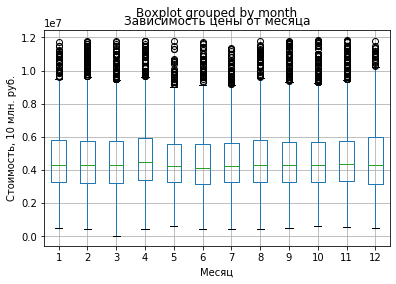

In [77]:
# построим диаграмму размаха для цены и месяца
good_data.boxplot('last_price', by='month')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от месяца')
plt.show()

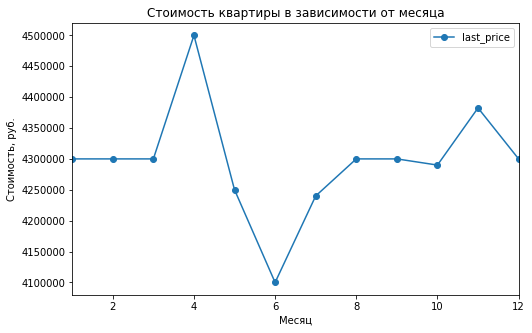

In [78]:
# приблизим масштаб предыдущего графика, построив только для медианных значений цены
(good_data
     .pivot_table(index='month', values='last_price',aggfunc='median')
     .plot(grid=False, figsize=(8,5), xlim=(1,12), style='o-')
)
plt.xlabel('Месяц')
plt.ylabel('Стоимость, руб.')
plt.title('Стоимость квартиры в зависимости от месяца')
plt.show()

Месяц не влияет на цену квартиры. Разница медианной цены в течение года составляет 40 тыс. руб. Так, дешевле квартиры стоили в июне, а дороже - в апреле.

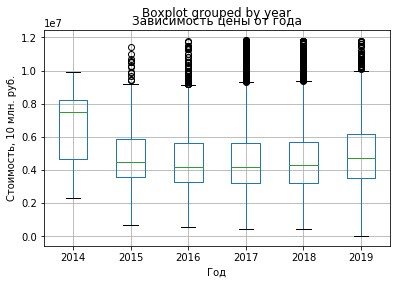

In [79]:
# построим диаграмму размаха для цены и года
good_data.boxplot('last_price', by='year')
plt.xlabel('Год')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от года')
plt.show()

В 2014г. квартиры продавались значительно дороже по сравнению с 2015-2019гг. 

Больше всего на цену квартиры влияет её площадь, количество комнат также увеличивает стоимость квартиры. Дороже стоят квартиры на этажах отличных от первого и последнего.   
В свою очередь расстояние от центра населенного пункта слабо влияет на стоимость, а день недели и месяц вообше никак не влияют на цену квартиры. В 2014г. квартиры стоили значительно больше, чем сейчас, но это объясняется макроэкономической ситуацией тех лет. 

#### Отбор 10 населенных пунктов с наибольшим числом объявлений

In [80]:
median_price = good_data.pivot_table(index='locality_name', values='price_per_sm', aggfunc=['count','median'])
median_price.columns = ('count', 'median')
median_price.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,11652,101991.20
посёлок Мурино,476,86137.25
посёлок Шушары,402,76748.00
Всеволожск,348,65789.50
Колпино,304,74421.55
посёлок Парголово,300,91289.20
Пушкин,294,98454.75
Гатчина,266,67860.55
деревня Кудрово,262,92044.85


Такие населенные пункты как **Санкт-Петербург, Пушкин, деревня Кудрово** являются лидерами по средней стоимости за квадратный метр. В свою очередь, дешевле самая низкая стоимость за квадратный метр в **Выборге, Всеволожске и Гатчине**. 


#### Определение центральной зоны Санкт-Петербурга

In [81]:
# создадим столбец с расстоянием до центра в километрах
good_data['citycentr_km'] = round(good_data['cityCenters_nearest'] / 1000, 0)

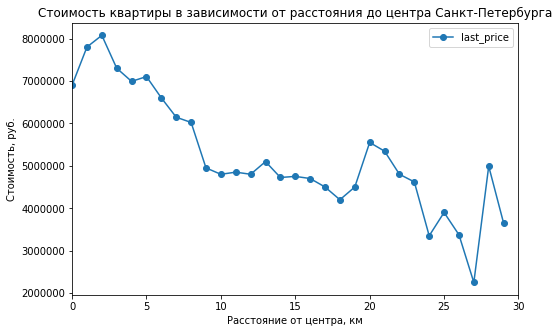

In [82]:
# построим график для средней цены на каждый километр в Санкт-Петербурге
(good_data
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='citycentr_km', values='last_price',aggfunc='median')
     .plot(grid=False, figsize=(8,5), xlim=(0,30), style='o-')
)
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Стоимость, руб.')
plt.title('Стоимость квартиры в зависимости от расстояния до центра Санкт-Петербурга')
plt.show()

Как можно заметить из графика стоимость квартиры резко падает (сразу на миллион рублей) после 8 километра. В соответствии с этим определим границы центра Санкт-Петербурга. 

In [83]:
# Выделим центр Санкт-Петербурга
spb_center = good_data.query('locality_name == "Санкт-Петербург" and citycentr_km < 9')

#### Исследуем  квартиры в центре Санкт-Петербурга подробнее:

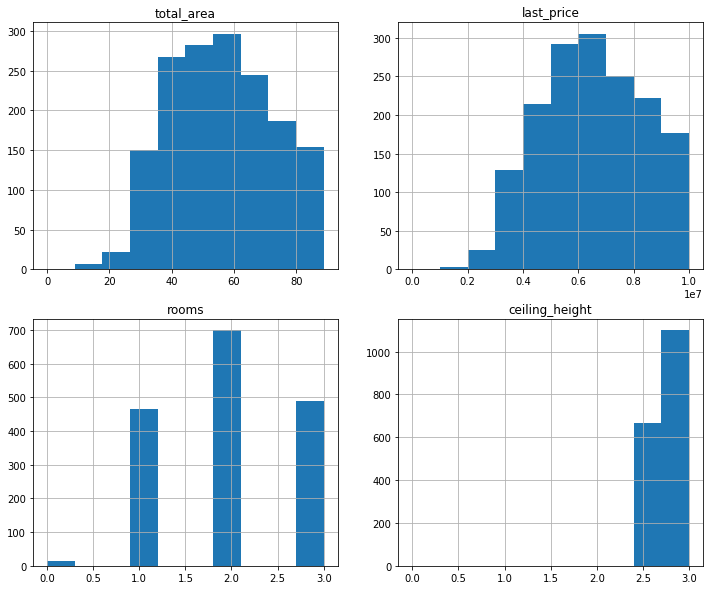

In [84]:
# построим гистограммы для центра Петербурга для следующих параметров: площадь квартиры, цена, количество комнат, высота потолков
plt.subplots(figsize = (12,10))
plots_in_row = 2

spb_center_hist = spb_center[['total_area','last_price','rooms','ceiling_height']]
for i,element in enumerate (spb_center_hist.columns.values):
    spb_center_hist[element].hist(bins = 10,
                                 range = (0, spb_center_hist[element].quantile(0.9)),
                                 ax = plt.subplot(2, len(spb_center_hist.columns.values)//plots_in_row, i+1))
    plt.title(element)
plt.show()

In [85]:
# посчитаем характерные значения для площади, цены, количества комнат и высоты потолков в центре Санкт-Петербурга
spb_center_hist.describe()

,total_area,last_price,rooms,ceiling_height
count,1788.000000,1.788000e+03,1788.000000,1788.000000
mean,60.346723,6.939718e+06,2.135347,2.758188
std,20.074528,2.195659e+06,0.915955,0.185478
min,12.000000,1.600000e+06,0.000000,2.400000
25%,44.500000,5.267500e+06,1.000000,2.550000
50%,58.595000,6.750000e+06,2.000000,2.750000
75%,74.225000,8.500000e+06,3.000000,3.000000
max,114.200000,1.186686e+07,6.000000,3.050000


In [86]:
# для наглядности сравним с соответствующими характерными значениями для города в целом
good_data[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,18632.000000,1.863200e+04,18632.000000,18632.000000
mean,51.640544,4.680815e+06,1.881870,2.652923
std,17.024630,2.099746e+06,0.874467,0.139134
min,12.000000,1.219000e+04,0.000000,2.250000
25%,38.400000,3.270000e+06,1.000000,2.550000
50%,48.000000,4.300000e+06,2.000000,2.600000
75%,62.000000,5.750000e+06,3.000000,2.750000
max,114.200000,1.186686e+07,6.000000,3.050000


Средняя квартира в центре Санкт-Петербурга обладает следующими параметрами: это двухкомнатная квартира, площадью 59м, с высотой потолков 2,75м, купленная за 6,75 млн. рублей.

#### Теперь рассмотрим какие факторы оказывают влияние на стоимость квартиры в центре Санкт-Петербурга

In [87]:
# построим матрицу корреляции, чтобы увидеть, что влияет на цену квартир
spb_center[['last_price', 'total_area','citycentr_km','rooms', 'floor_cat', 'day', 'month', 'year']].corr()

,last_price,total_area,citycentr_km,rooms,day,month,year
last_price,1.000000,0.715335,-0.178776,0.459161,0.018580,-0.020022,0.033558
total_area,0.715335,1.000000,-0.194709,0.801015,-0.013261,0.006887,-0.073510
citycentr_km,-0.178776,-0.194709,1.000000,-0.172743,0.026647,-0.017789,0.073882
rooms,0.459161,0.801015,-0.172743,1.000000,-0.029113,0.009239,-0.051492
day,0.018580,-0.013261,0.026647,-0.029113,1.000000,0.049270,0.006746
month,-0.020022,0.006887,-0.017789,0.009239,0.049270,1.000000,-0.306994
year,0.033558,-0.073510,0.073882,-0.051492,0.006746,-0.306994,1.000000


В центре Санкт-Петербурга наблюдается примерно схожая картина как и по городу в целом. Стоит отметить, что в центре влияние двух основных факторов (общей площади и количества комнат) ощущается чуть сильнее, чем в городе в целом.

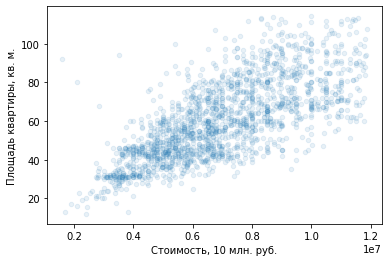

In [88]:
# Построим диаграмму рассеивания для площади и цены 
spb_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
plt.xlabel('Стоимость, 10 млн. руб.')
plt.ylabel('Площадь квартиры, кв. м.')
plt.show()

In [89]:
# Рассчитаем коэффициент корреляции для площади и цены квартиры
print('Коэффициент корреляции: {:.2f}'.format(spb_center['total_area'].corr(spb_center['last_price'])))

Коэффициент корреляции: 0.72


Площадь в центре Санкт-Петербурга даже сильнее влияет на цену квартиры. Коэффициент корреляции 0.72 указывает на сильную прямую связь.

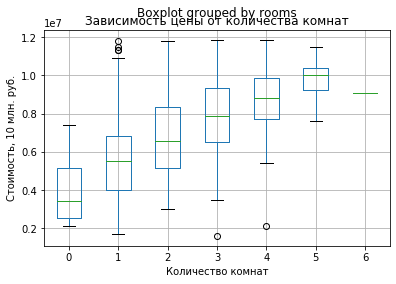

In [90]:
# построим диаграмму размаха для цены и количества комнат
spb_center.boxplot('last_price', by='rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от количества комнат')
plt.show()

В центре Санкт-Петербурга можно заметить прямую зависимость цены квартиры от количества комнат. Схожя зависимость наблюдалась и в данных по городу в целом.

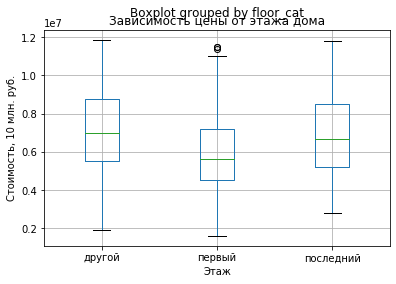

In [91]:
# построим диаграмму размаха для цены и этажности дома
spb_center.boxplot('last_price', by='floor_cat')
plt.xlabel('Этаж')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от этажа дома')
plt.show()

В центре Санкт-Петербурга квартиры на первом этаже стоят дешевле по сравнению с другим этажами. Схожую картину можно было наблюдать и по городу в целом.

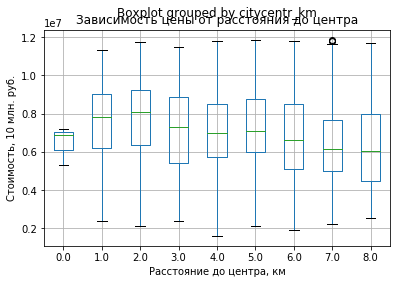

In [92]:
# построим диаграмму размаха для цены и расстояния до центра
spb_center.boxplot('last_price', by='citycentr_km')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от расстояния до центра')
plt.show()

Ситуация схожая с общими данными по всему городу. В центре Петербурга нельзя сказать, что есть сильная взаимосвязь стоимости квартиры от расстояния до центра города.

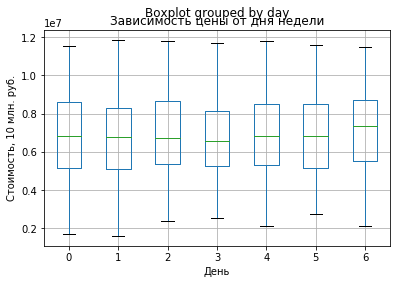

In [93]:
# построим диаграмму размаха для цены и дня недели
spb_center.boxplot('last_price', by='day')
plt.xlabel('День')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от дня недели')
plt.show()

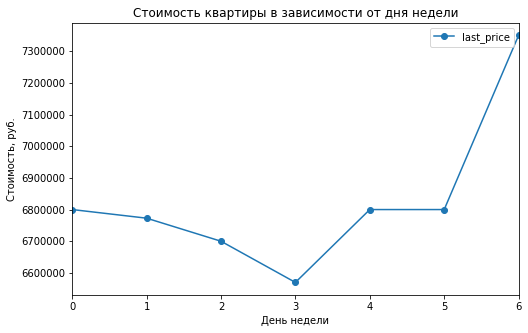

In [94]:
# приблизим масштаб предыдущего графика, построив только для медианных значений цены
(spb_center
     .pivot_table(index='day', values='last_price',aggfunc='median')
     .plot(grid=False, figsize=(8,5), xlim=(0,6), style='o-')
)
plt.xlabel('День недели')
plt.ylabel('Стоимость, руб.')
plt.title('Стоимость квартиры в зависимости от дня недели')
plt.show()

Зависимости между ценой и днем недели обнаружено не было. Но стоит отметить, что в среднем, квартиры, которые публиковались по воскресеньям продавались дороже. Разница в цене по сравнению с самым "дешевым" днем около 70 тыс. рублей. В общих данных по всему городу в воскресенье наоборот квартиры продавались дешевле всего.

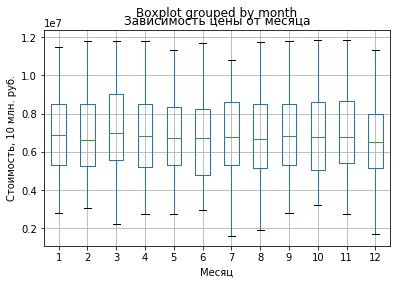

In [95]:
# построим диаграмму размаха для цены и месяца
spb_center.boxplot('last_price', by='month')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от месяца')
plt.show()

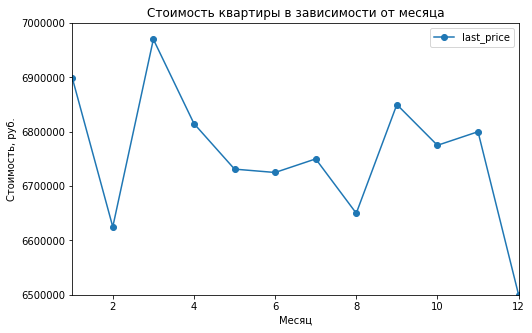

In [96]:
# приблизим масштаб предыдущего графика, построив только для медианных значений цены
(spb_center
     .pivot_table(index='month', values='last_price',aggfunc='median')
     .plot(grid=False, figsize=(8,5), xlim=(1,12), style='o-')
)
plt.ylim(6500000,7000000)
plt.xlabel('Месяц')
plt.ylabel('Стоимость, руб.')
plt.title('Стоимость квартиры в зависимости от месяца')
plt.show()

Месяц не влияет на цену квартиры. Но в среднем квартиры в центре Санкт-Петербурга стоили дешевле в декабре. Разница по сравнению с самым "дорогим" месяцем (мартом) составляет около 50 тыс. рублей.

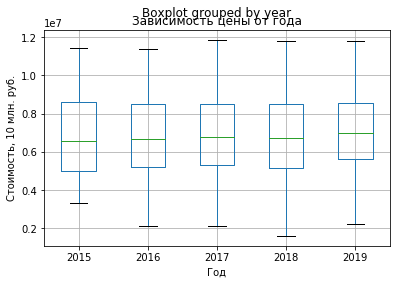

In [97]:
# построим диаграмму размаха для цены и года
spb_center.boxplot('last_price', by='year')
plt.xlabel('Год')
plt.ylabel('Стоимость, 10 млн. руб.')
plt.title('Зависимость цены от года')
plt.show()

Год не влияет на цену квартиры

#### Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга:  
  - Самый сильный фактор, оказывающий влияние на стоимость квартиры - площадь. В центре Санкт-Петербурга он выражен чуть сильнее, чем в общих данных по городу.  
  - В центре Санкт-Петербурга как и в городе в целом количество комнат напрямую влияет на цену квартиры.   
  - В центре Санкт-Петербурге квартиры на первом этаже стоят дешевле, схожая картина наблюдалась и в общих данных.
  - В центре Санкт-Петербурга расстояние до центра квартиры не является определяющим фактором стоимости квартиры. В сравнении с общими данными взаимосвязь находится даже на более слабом уровне.
  - В центре Санкт-Петербурга также как и в общих данных по городу цена квартиры не зависит от даты размещения объявления о продаже.  
  Можно отметить, что в среднем квартиры в центре Санкт-Петербурга стоили дороже по воскресеньям, а в то же время в городе в целом воскресенье наоборот самый "дешевый" день.

### Шаг 5. Общий вывод

Основными факторами, влияющими на стоимость квартиры, являются её площадь и количество комнат.  
Стоит отметить, что расстояние квартиры до центра не демонстрирует сильного влияния на стоимость квартиры, это скорее второстепенный фактор. 
Количество этажей имеет непрямую зависимость на цену - так, в центре Санкт-Петербурга дешевле стоят квартиры на первом этаже.
В  свою очередь, дата размещения объявления о продаже квартиры не влияет на её стоимость.  